2025-12-20 01:32:27.090 | INFO     | src.data.csv_data_feed:__init__:43 - Loading CSV data from C:\Users\rdpuser\projects\bot-new\data\GBPAUD._H1_2025-12-01_2025-12-20.csv
2025-12-20 01:32:27.118 | INFO     | src.data.csv_data_feed:__init__:52 - Loaded 348 rows from CSV
2025-12-20 01:32:27.119 | INFO     | src.data.csv_data_feed:__init__:53 - Date range: 2025-12-01 12:00:00 to 2025-12-19 23:00:00
2025-12-20 01:32:27.122 | INFO     | src.data.csv_data_feed:__init__:114 - Limiting data to last 100 candlesticks (from 348 total)


Data Summary:
  GBPAUD:
    CSV File: C:\Users\rdpuser\projects\bot-new\data\GBPAUD._H1_2025-12-01_2025-12-20.csv
    Total rows: 100
    Data range: 2025-12-15 20:00:00 to 2025-12-19 23:00:00
    Price range: 2.01188 to 2.02864

self.trades: {}
self.trades: {}
self.trades: {}
self.trades: {}
self.trades: {}
self.trades: {}
self.trades: {}
self.trades: {}
*** ATTEMPTING TO STORE TP/SL: order.ref=1, TP=2.01713, SL=2.01246, hasattr(broker)=True ***
*** BROKER TYPE: <class 'src.brokers.backtesting_broker.BacktestingBroker'> ***
*** BROKER DOES NOT HAVE bracket_tp_sl attribute ***
self.trades: {'fbeac36c-1f66-43ca-9876-421636b0a997': {'trade_id': 'fbeac36c-1f66-43ca-9876-421636b0a997', 'symbol': 'GBPAUD', 'order_side': <OrderSide.BUY: 1>, 'state': <TradeState.PENDING: 1>, 'placed_candle': 7, 'entry_price': 2.01415, 'size': 671140, 'sl': 2.01246, 'tp': 2.01713, 'orders': {'main': <backtrader.order.BuyOrder object at 0x0000021413CBA120>, 'tp': <backtrader.order.SellOrder object at 0x00000214

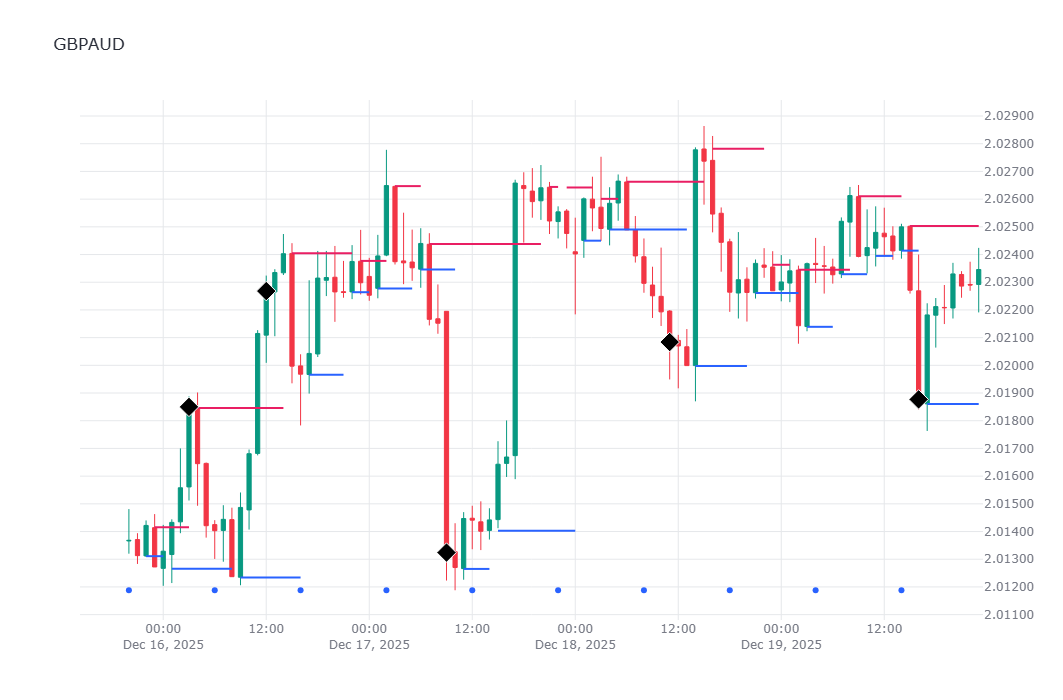

In [ ]:
import sys
import os
from datetime import datetime
from dotenv import load_dotenv
original_stdout = sys.stdout
original_stderr = sys.stderr
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')
dotenv_path = os.path.abspath(os.path.join("..", ".env"))
load_dotenv(dotenv_path)

os.environ['ZONE_INVERSION_MARGIN_MICROPIPS'] = '110'  # Zones Tuning
os.environ['BREAKOUT_MIN_STRENGTH_MICROPIPS'] = '100'  # Breakout Tuning
os.environ['MIN_RISK_DISTANCE_MICROPIPS'] = '0.001'

notebook_dir = os.getcwd()
if os.path.basename(notebook_dir) == "notebooks":
    parent_dir = os.path.abspath("..")
    if parent_dir not in sys.path:
        sys.path.insert(0, parent_dir)
from src.utils.config import Config
from src.models.timeframe import Timeframe
from src.utils.plot import plotly_plot
from main import backtesting

Config.show_debug_logs = True
# Tuning
# Config.zone_inversion_margin_micropips = 0 # Zones Tuning
# Config.breakout_min_strength_micropips = 100 # Breakout Tuning: We to break at least X amount of micropips in order to consider a breakout as valid
# Config.min_risk_distance_micropips = 0 


max_candles = 300
symbols = ['GBPJPY']
timeframe = Timeframe.M15
start_date = datetime(2025, 12, 1, 13, 10, 0)
end_date = datetime.now()



cerebro, data = backtesting(
        symbols=symbols,
        timeframe=timeframe,
        start_date=start_date,
        end_date=end_date,
        max_candles=max_candles
    )
for symbol_index, (symbol, pair_data) in enumerate(data.items()):
    plotly_plot(cerebro, pair_data, symbol, symbol_index=symbol_index, height=700)